In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
import math
import cv2
import easyocr
from skimage.feature import local_binary_pattern

In [2]:
# Make sure image folder path is correct
train_path = '2025_A2/train'
test_path = '2025_A2/test'

In [3]:
metadata = pd.read_csv("2025_A2/train/train_metadata.csv")
additional_features = pd.read_csv("2025_A2/train/Features/additional_features.csv")
color_histogram = pd.read_csv("2025_A2/train/Features/color_histogram.csv")
hog_pca = pd.read_csv("2025_A2/train/Features/hog_pca.csv")

# Exploratory Data Analysis

## Visualisations 

In [4]:
color_histogram

,image_path,ch_0,ch_1,ch_2,ch_3,ch_4,ch_5,ch_6,ch_7,ch_8,...,ch_86,ch_87,ch_88,ch_89,ch_90,ch_91,ch_92,ch_93,ch_94,ch_95
0,img_000001.jpg,0.000000,0.000000,0.268901,0.355617,0.511548,0.264923,0.526664,0.321408,0.097059,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,img_000002.jpg,0.000000,0.002267,0.657901,0.641467,0.222700,0.243100,0.108233,0.036833,0.021533,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,img_000003.jpg,0.002243,0.143541,0.385766,0.091956,0.066163,0.204097,0.353245,0.218676,0.222040,...,0.062342,0.056108,0.049874,0.043639,0.061303,0.072732,0.082084,0.110137,0.156894,0.670176
3,img_000004.jpg,0.000000,0.096069,0.947646,0.217350,0.160404,0.083028,0.042601,0.045209,0.040427,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,img_000005.jpg,0.000000,0.000000,0.000000,0.000000,0.000000,0.015324,0.029918,0.024810,0.097779,...,0.013489,0.023231,0.016487,0.008243,0.025479,0.023981,0.011241,0.006745,0.006745,0.014988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5483,img_005484.jpg,0.000000,0.005113,0.063918,0.241182,0.466172,0.542874,0.327258,0.088632,0.384358,...,0.010370,0.017284,0.019358,0.025580,0.021432,0.047013,0.070519,0.105087,0.152100,0.763265
5484,img_005485.jpg,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.240318,0.059315,0.034855,0.012230,0.008561,0.011007,0.009784,0.010395,0.009784,0.201182
5485,img_005486.jpg,0.005808,0.045637,0.260545,0.253077,0.143549,0.107039,0.080487,0.072189,0.062232,...,0.019605,0.020726,0.030248,0.021286,0.029128,0.024086,0.047613,0.098026,0.185409,0.949452
5486,img_005487.jpg,0.000000,0.504522,0.417509,0.373240,0.436591,0.116780,0.052666,0.032057,0.022135,...,0.038084,0.052931,0.180739,0.223987,0.229797,0.016137,0.000000,0.000000,0.000000,0.000000


In [5]:
fake = color_histogram.drop("image_path", axis = 1)
lst = [sum(fake.iloc[i]) for i in range(len(color_histogram))]
max(lst)

15.765565319

Colors_histogram: Probably first 32 channels are binned Red values: [0, 7]... [248, 255]. And next 32 are green etc, next 32 blue. The numbers relate to the AMOUNT of pixels belonging to each bin (probably a scaled frequency, because it isn't a proportion).

In [6]:
additional_features

,image_path,edge_density,mean_b,mean_g,mean_r
0,img_000001.jpg,0.050293,63.748291,62.107910,62.850830
1,img_000002.jpg,0.034424,48.680664,52.872314,61.539307
2,img_000003.jpg,0.126709,99.174561,110.774658,127.348389
3,img_000004.jpg,0.026123,30.493896,26.616211,29.006592
4,img_000005.jpg,0.106934,116.836670,97.684814,79.495605
...,...,...,...,...,...
5483,img_005484.jpg,0.100586,97.798096,107.457275,139.611816
5484,img_005485.jpg,0.034180,171.357422,156.866699,163.271484
5485,img_005486.jpg,0.247559,144.043701,158.237793,180.798340
5486,img_005487.jpg,0.038818,89.712158,84.372314,83.712646


In [7]:
metadata

,id,image_path,ClassId
0,7218,img_000001.jpg,32
1,6333,img_000002.jpg,13
2,6867,img_000003.jpg,7
3,7730,img_000004.jpg,4
4,6338,img_000005.jpg,35
...,...,...,...
5483,456,img_005484.jpg,17
5484,4084,img_005485.jpg,4
5485,5117,img_005486.jpg,2
5486,3334,img_005487.jpg,3


In [8]:
np.sort(metadata['ClassId'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42])

In [9]:
hog_pca

,image_path,hog_pca_0,hog_pca_1,hog_pca_2,hog_pca_3,hog_pca_4,hog_pca_5,hog_pca_6,hog_pca_7,hog_pca_8,...,hog_pca_10,hog_pca_11,hog_pca_12,hog_pca_13,hog_pca_14,hog_pca_15,hog_pca_16,hog_pca_17,hog_pca_18,hog_pca_19
0,img_000001.jpg,-0.763458,0.927880,0.264329,-0.638673,0.831455,-0.527469,-0.959387,-0.538355,1.262615,...,-0.439643,-1.485862,-0.892584,-0.455376,-0.979620,0.450825,-0.213796,-0.882416,-0.309656,0.271686
1,img_000002.jpg,1.049284,3.608200,-1.817190,0.904380,-0.282195,0.623239,-0.510430,-0.388628,-0.457727,...,-0.190342,0.210740,-0.011180,0.138000,0.101737,-0.335682,-0.886182,0.507969,0.006536,0.471807
2,img_000003.jpg,-1.552440,-0.432374,-0.318422,0.671877,-0.381869,-0.224374,0.565182,0.267907,0.144193,...,0.521769,0.328718,-0.357041,-0.192591,0.377116,0.501386,-0.421448,0.081289,0.730258,-0.205895
3,img_000004.jpg,-1.556871,0.214406,0.973758,0.613876,-0.657341,0.007032,0.140899,-0.159095,-0.187679,...,0.948256,-0.115478,0.146324,-0.296778,-0.595600,0.285638,-0.481589,-0.101580,-0.139084,0.586276
4,img_000005.jpg,-0.944294,-0.334833,0.415215,-0.607014,-1.004900,0.172754,-0.692467,-0.193404,1.385177,...,1.007779,-0.219087,0.420509,-0.053858,0.601939,-0.520063,0.062209,0.248771,0.140214,0.292198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5483,img_005484.jpg,-0.562495,0.643567,0.254784,-1.583481,0.202211,1.504130,0.263140,0.253128,0.480586,...,-0.842139,-0.119560,0.169551,0.016671,-0.143923,-0.141590,0.172979,-0.356541,-0.167192,-0.452964
5484,img_005485.jpg,-1.370223,-0.398313,0.378050,0.168035,-0.212531,-0.341123,-0.318070,-0.342226,0.765626,...,-0.096614,-0.411194,-0.047927,-0.044189,0.388909,-0.294122,-0.072038,0.171852,-0.131252,0.146278
5485,img_005486.jpg,-1.951729,-1.117028,-1.187795,0.350751,-0.016377,-0.663806,0.582249,-0.877313,-0.562128,...,0.165496,0.204292,0.056600,0.439432,0.459455,-0.542944,0.056787,-0.252209,-0.082190,-0.157411
5486,img_005487.jpg,-2.264590,-1.266415,-0.831067,0.579172,-0.497001,-0.237512,-0.715835,0.255480,-0.007029,...,-0.312279,-0.305216,0.010809,0.408131,-0.286114,0.211036,-0.284097,0.555815,-1.190879,0.073978


In [10]:
df = metadata.merge(additional_features, on = "image_path")#.merge(color_histogram, on = "image_path").merge(hog_pca, on = 'image_path') # merge all except PCA
df

,id,image_path,ClassId,edge_density,mean_b,mean_g,mean_r
0,7218,img_000001.jpg,32,0.050293,63.748291,62.107910,62.850830
1,6333,img_000002.jpg,13,0.034424,48.680664,52.872314,61.539307
2,6867,img_000003.jpg,7,0.126709,99.174561,110.774658,127.348389
3,7730,img_000004.jpg,4,0.026123,30.493896,26.616211,29.006592
4,6338,img_000005.jpg,35,0.106934,116.836670,97.684814,79.495605
...,...,...,...,...,...,...,...
5483,456,img_005484.jpg,17,0.100586,97.798096,107.457275,139.611816
5484,4084,img_005485.jpg,4,0.034180,171.357422,156.866699,163.271484
5485,5117,img_005486.jpg,2,0.247559,144.043701,158.237793,180.798340
5486,3334,img_005487.jpg,3,0.038818,89.712158,84.372314,83.712646


In [11]:
df['image'] = df['image_path'].apply(lambda x: cv2.cvtColor(cv2.imread(train_path + '/' + x), cv2.COLOR_BGR2RGB)) # Just load the images into dataset

In [12]:
df['ClassId'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5488 entries, 0 to 5487
Series name: ClassId
Non-Null Count  Dtype
--------------  -----
5488 non-null   int64
dtypes: int64(1)
memory usage: 43.0 KB


In [13]:
(df.isnull().sum()).sum()

np.int64(0)

No missing values.

In [14]:
arr = np.sort(df['ClassId'])
arrs = np.unique(arr, return_counts=True)
num_id = len(arrs[0])
arrs


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 array([ 29, 311, 315, 197, 277, 260,  59, 202, 197, 206, 281, 185, 294,
        302, 109,  88,  59, 155, 168,  29,  50,  46,  55,  71,  38, 210,
         84,  34,  76,  38,  63, 109,  34,  96,  59, 168,  55,  29, 290,
         42,  50,  34,  34]))

In [15]:
# OR - Classifier accuracy 
zeroR_acc = max(arrs[1]) * 100 / len(df)
zeroR_acc

np.float64(5.739795918367347)

In [16]:
# 0R - Classifier choice 
for i in range(len(arrs[0])):
    if arrs[1][i] == max(arrs[1]):
        zeroR_choice = arrs[0][i]
        break

print(f'0R-Classifier would choose a classID of {zeroR_choice}, which appears {max(arrs[1])} times. \
      \nIt would then have an accuracy of {zeroR_acc:.2f}%.')

0R-Classifier would choose a classID of 2, which appears 315 times.       
It would then have an accuracy of 5.74%.


Text(0.5, 1.0, 'ClassID counts')

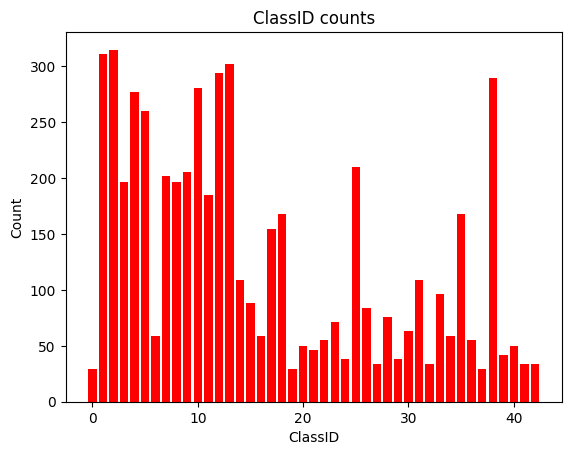

In [17]:
plt.bar(arrs[0], arrs[1], color= 'red')
plt.xlabel("ClassID")
plt.ylabel("Count")
plt.title("ClassID counts")

## Feature extractions

In [18]:
train_images = df['image'].to_list()

The first big thing we want to do is find the shape of traffic signs. Use canny edge detection to find the shapes in each image. Images are already blurry - won't apply gausian blur filter. Shapes aren't only things that matter; numbers on speed limit signs matter too. 

### Shape detection

(Text(0.5, 1.0, 'Edge Image'), ([], []), ([], []))

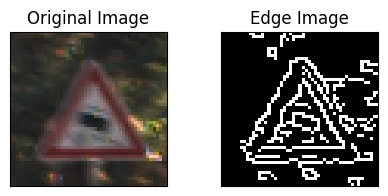

In [19]:
# Adapted from https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html

img = train_images[6]

blurred = cv2.GaussianBlur(img, (5, 5), 0)
median = np.median(blurred)
edges = cv2.Canny(img, 2*median, 4*median) # The two parameters here determine how sensitive we are to edges 

plt.figure(figsize=(5, 2))

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])


To identify the shape, we don't really need to fine tune the edges very much. It seems to work very well even on very blurred images. Let's just save all these images. Translating to grayscale doesn't do much. 

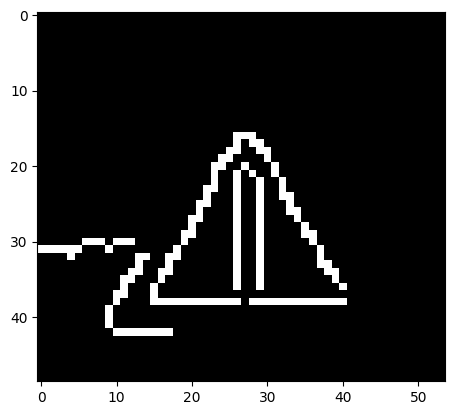

In [20]:
edges_list = []
for i in range(len(train_images)):
    img = train_images[i]
    blurred = cv2.GaussianBlur(img, (5, 5), 0)
    median = np.median(blurred)
    edges = cv2.Canny(blurred, 0.8*median, 1.6*median)
    edges_list.append(edges)
plt.imshow(edges_list[10], cmap = 'gray')

In [21]:
len(edges_list[0])

30

In [22]:
def full_black(edges):
    for row in edges: 
        if max(row) > 0:
            return False
    return True
len([edges for edges in edges_list if full_black(edges)])

27

Only a few data points whose shaps can't be found; compromise too much on letting noise in to reduce threshold any further, will just cause every contour to generalise to a circle. Need to delete the images which cannot be classified unless the threshold is too low.

Now onto shape detection

In [23]:
epsilon = 1e-12
def contour_score(contour, area_threshold = 50): 
    ''' Rates a contour by how good it is at predicting a shape.  
    contour - input contour
    area_threshold - smallest allowed area 
    '''
    area = cv2.contourArea(contour)

    if area <= area_threshold:
        return 1e-6

    hull = cv2.convexHull(contour)
    solidity = area / (cv2.contourArea(hull) + 1)

    return area * math.sqrt(solidity)


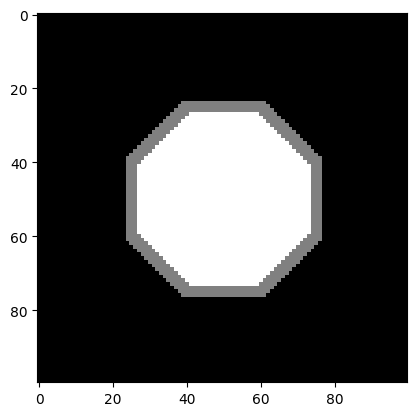

In [24]:
# Quadrilateral template, knowing that the only quadrilateral which shows up in the dataset is a diamond
blank = np.zeros((100, 100), dtype=np.uint8)
pts = np.array([[25, 50], [50, 75], [75, 50], [50, 25]])
pts = pts.reshape(-1, 1, 2)
cv2.drawContours(blank, [pts], 0, 255, -1)

contours, _ = cv2.findContours(blank, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(blank, [contours[0]], 0, 128, 2)
#plt.imshow(blank, cmap = 'gray')
quadrilateral_template = contours[0]


# Circle template
blank = np.zeros((100, 100), dtype=np.uint8)
cv2.circle(blank, center=(50, 50), radius=25, color=255, thickness=-1)
contours, _ = cv2.findContours(blank, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(blank, [contours[0]], 0, 128, 2)
plt.imshow(blank, cmap = 'gray')
circle_template = contours[0]

# Triangle template
blank_img = edges_list[1].copy()
contours, _ = cv2.findContours(blank_img , cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
triangle = max(contours, key = cv2.contourArea)
cv2.drawContours(blank_img , [triangle], 0, 128, 1)
plt.imshow(blank_img, cmap = 'gray')
triangle_template = triangle

# Octagon template: Stop sign only 
blank = np.zeros((100, 100), dtype=np.uint8)
pts = np.array([[40, 75], [60, 75], [75, 60], [75, 40], [60, 25], [40, 25], [25, 40], [25, 60]])
pts = pts.reshape(-1, 1, 2)
cv2.drawContours(blank, [pts], 0, 255, -1)

contours, _ = cv2.findContours(blank, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(blank, [contours[0]], 0, 128, 2)
plt.imshow(blank, cmap = 'gray')
octagon_template = contours[0]

T Similarity. Contour: 0.11883592678985833, Area: 4.0
Q Similarity. Contour: 0.17064400143661174
O Similarity. Contour: 0.16975617972209994
C Similarity. Contour: 0.1697190897906701
T Similarity. Contour: 0.05722597200408058, Area: 2.0
Q Similarity. Contour: 0.0906061893840855
O Similarity. Contour: 0.09035527790234828
C Similarity. Contour: 0.09034476902601712
T Similarity. Contour: 0.07339235426025387, Area: 1.5
Q Similarity. Contour: 0.14954523359181357
O Similarity. Contour: 0.15023380563771563
C Similarity. Contour: 0.15026286720844845
T Similarity. Contour: 1.0, Area: 336.5
Q Similarity. Contour: 0.9232701673400118
O Similarity. Contour: 0.897863468023966
C Similarity. Contour: 0.8968268502594695
T Similarity. Contour: 0.11626945788440313, Area: 1.5
Q Similarity. Contour: 0.20233088888854434
O Similarity. Contour: 0.20359339947053573
C Similarity. Contour: 0.20364677484979596
T Similarity. Contour: 0.14600403278509858, Area: 3.0
Q Similarity. Contour: 0.2060021594747319
O Similar

(Text(0.5, 1.0, 'Contours'), ([], []), ([], []))

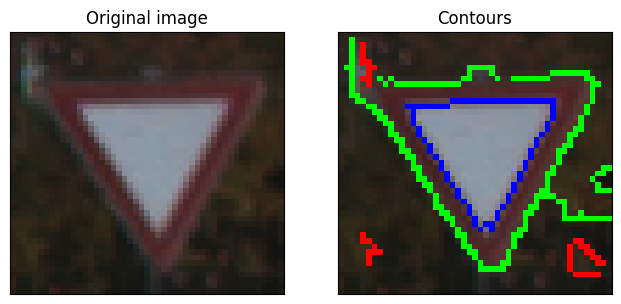

In [121]:
plt.figure(figsize=(12, 4))

j=1
img = edges_list[j]

ogimg_copy = train_images[j].copy()
plt.subplot(131),plt.imshow(ogimg_copy,cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])

contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
shapes = []
contour_weights = []
i=0
k=0
# Iterate over all contours 
for contour in contours:
    if i == 0:
        i = 1
        continue
    epsilon = 0.01
    # Simplify the contour 
    approx = cv2.approxPolyDP(contour, epsilon * cv2.arcLength(contour, True), True)

    if contour_score(contour) == 0: 
        continue
    contour_weights.append(contour_score(contour))

    # Test against templates and get similarity scores, weighted by area
    T_score = 1/(cv2.matchShapes(contour, triangle_template, 1, 0)+1)
    Q_score = 1/(cv2.matchShapes(contour, quadrilateral_template, 1, 0) + 1)
    H_score = 1/(cv2.matchShapes(contour, octagon_template, 1, 0) + 1)
    C_score = 1/(cv2.matchShapes(contour, circle_template, 1, 0)+1)
    scores = [T_score, Q_score, H_score, C_score]

    # Check which similariy score is largest
    if scores.index(max(scores)) == 0: 
        shapes.append('triangle')
        col = (0, 0, 255)
    elif scores.index(max(scores)) == 1:
        shapes.append('quadrilateral')
        col = (255, 0, 0)
    elif scores.index(max(scores)) == 2: 
        shapes.append('octagon')
        col = (128, 0, 128)
    elif scores.index(max(scores)) == 3: 
        shapes.append('circle')
        col = (0, 255, 0)

    print(f'T Similarity. Contour: {scores[0]}, Area: {cv2.contourArea(contour)}')
    print(f'Q Similarity. Contour: {scores[1]}')
    print(f'O Similarity. Contour: {scores[2]}')
    print(f'C Similarity. Contour: {scores[3]}')
    cv2.drawContours(ogimg_copy, [contour], 0, col, 1)

## Find the best scores and classify the shape based on the shape with best score 
highest_weight = max(contour_weights)
best_shapes_indices = [i for i in range(len(contour_weights)) if contour_weights[i] == max(contour_weights)]
best_shape = stats.mode([shapes[i] for i in best_shapes_indices])

print(best_shape)
print(shapes)
plt.subplot(132),plt.imshow(ogimg_copy, cmap = 'gray')
plt.title('Contours'), plt.xticks([]), plt.yticks([])
#plt.subplot(133),plt.imshow(blank, cmap ='gray')
#plt.title('Template'), plt.xticks([]), plt.yticks([])

In [29]:
imgs = []
for i in range(num_id):
    tmp = df[df['ClassId'] == i]
    path = tmp['image_path']
    imgs.append(path.sample(n=1))
imgs
# The class types consist of: 1 Quadrilateral, 1 Hexagon
# Rest are triangles/quadrilaterals. 

[118    img_000119.jpg
 Name: image_path, dtype: object,
 1095    img_001096.jpg
 Name: image_path, dtype: object,
 4379    img_004380.jpg
 Name: image_path, dtype: object,
 3602    img_003603.jpg
 Name: image_path, dtype: object,
 4759    img_004760.jpg
 Name: image_path, dtype: object,
 1837    img_001838.jpg
 Name: image_path, dtype: object,
 2439    img_002440.jpg
 Name: image_path, dtype: object,
 131    img_000132.jpg
 Name: image_path, dtype: object,
 4534    img_004535.jpg
 Name: image_path, dtype: object,
 4384    img_004385.jpg
 Name: image_path, dtype: object,
 4689    img_004690.jpg
 Name: image_path, dtype: object,
 1030    img_001031.jpg
 Name: image_path, dtype: object,
 4828    img_004829.jpg
 Name: image_path, dtype: object,
 3438    img_003439.jpg
 Name: image_path, dtype: object,
 592    img_000593.jpg
 Name: image_path, dtype: object,
 3302    img_003303.jpg
 Name: image_path, dtype: object,
 2726    img_002727.jpg
 Name: image_path, dtype: object,
 5108    img_0051

We want to penalise contours which are too small.

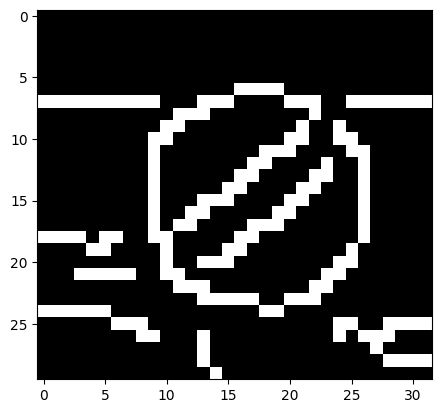

In [30]:
plt.imshow(edges_list[0], cmap = 'gray')

In [31]:
def main_shape(contour):
    ''' identifies the shape of a contour based on template matching.
    '''
    T_score = 1/(cv2.matchShapes(contour, triangle_template, 1, 0)+1)
    Q_score = 1/(cv2.matchShapes(contour, quadrilateral_template, 1, 0) + 1)
    H_score = 1/(cv2.matchShapes(contour, octagon_template, 1, 0) + 1)
    C_score = 1/(cv2.matchShapes(contour, circle_template, 1, 0)+1)
    scores = [T_score, Q_score, H_score, C_score]
    shape = 'circle'
    if scores.index(max(scores)) == 0: 
        shape == 'triangle'
    elif scores.index(max(scores)) == 1:
        shape = 'quadrilateral'
    elif scores.index(max(scores)) == 2: 
        shape = 'octagon'
    return shape 


In [32]:
# Code adapted from https://www.geeksforgeeks.org/how-to-detect-shapes-in-images-in-python-using-opencv/
#=0
#hapes_list = []
#or img in edges_list:
#   contours, _ = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#   shapes = []
#   areas = []
#   i=0
#   for contour in contours:
#       if i == 0:
#           i = 1
#           continue
#       epsilon = 0.07
#       approx = cv2.approxPolyDP(contour, epsilon * cv2.arcLength(contour, True), True)
#       
#       if len(approx) < 3: 
#           continue
#       elif len(approx) == 3:
#           shapes.append('triangle')
#       elif len(approx) == 4:
#           shapes.append('quadrilateral')
#       elif len(approx) == 5:
#           shapes.append('pentagon')
#       elif len(approx) == 6: 
#           shapes.append('hexagon')
#       else: 
#           shapes.append('circle')
#       areas.append(contour_score(contour, 10, epsilon))
#   if shapes == []:
#       shapes_list.append('na')
#       continue
#   
#   ## Find the best scores and classify the shape based on the shape with best score 
#   best_score = max(scores)
#   best_shapes_indices = [i for i in range(len(scores)) if scores[i] == max(scores)]
#   best_shape = stats.mode([shapes[i] for i in best_shapes_indices])
#
#   shapes_list.append(best_shape)



This method doesn't really work - the contours are 

In [33]:
#j=1
#print(shapes_list[j])
#plt.imshow(train_images[j],cmap = 'gray')

### Color detection

Our goal is to find the color of the sign. The colors the sign could be are red, blue, black, yellow. 

In [34]:
def is_dark(image, threshold = 20):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return np.mean(gray) < threshold

In [35]:
def normalise_brightness(img, target_mean = 128):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv)

    mean_v = np.mean(v)
    scale = target_mean / mean_v
    v = np.clip(v.astype(np.float32) * scale, 0, 255).astype(np.uint8)

    hsv_norm = cv2.merge([h, s, v])
    img_norm = cv2.cvtColor(hsv_norm, cv2.COLOR_HSV2RGB)    
    return img_norm
    

In [36]:
def remove_border(image):
    ''' Removes external pixels outside of a circle extending from the center of the image
    '''
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    h, w = image.shape[:2]
    center_mask = np.zeros((h, w), dtype = np.uint8)
    cv2.circle(center_mask, (w // 2, h // 2), radius = (min(h, w)) * 4 //  9 , color = 255, thickness = -1)
    
    outside_circle = cv2.bitwise_not(center_mask)

    outside_circle_mask = cv2.merge([outside_circle]*3)
    result = image.copy()
    result[outside_circle_mask > 0] = 0

    return result



In [37]:
def color_segmentation(image, color):
    ''' Performs color segmentation on the image using the provided color. 
    Returns a 2-tuple containing the image in RGB and B/W resp.
    '''
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    result = image.copy()

    if color == 'red':
        # lower boundary RED color range values; Hue (0 - 10)
        lower1 = np.array([0, 50, 20])
        upper1 = np.array([10, 255, 255])
        
        # upper boundary RED color range values; Hue (160 - 180)
        lower2 = np.array([160, 50, 20])
        upper2 = np.array([179,255,255])
        
        lower_mask = cv2.inRange(hsv, lower1, upper1)
        upper_mask = cv2.inRange(hsv, lower2, upper2)
        
        full_mask = lower_mask + upper_mask;
        return (cv2.bitwise_and(result, result, mask=full_mask), full_mask)
    elif color == 'blue':
        lower = np.array([105, 70, 20])
        upper = np.array([125, 255, 255])    
    elif color == 'yellow':
        lower = np.array([10, 60, 20])
        upper = np.array([35, 255, 255])

    mask = cv2.inRange(hsv, lower, upper)
    return (cv2.bitwise_and(result, result, mask=mask), mask)

In [38]:
def process_image(image, color, kind = 1, brightness = 100):
    result = image.copy()
    result = normalise_brightness(result, brightness)
    result = remove_border(result)
    result = color_segmentation(result, color)[kind]
    return result

In [39]:
def find_best_contour(image, mode, method):
    ''' finds the best contour of a binary image on the basis of area size. 
    '''
    contours,_ = cv2.findContours(image, mode, method)
    best_cnt = max(contours, key = cv2.contourArea)
    return best_cnt

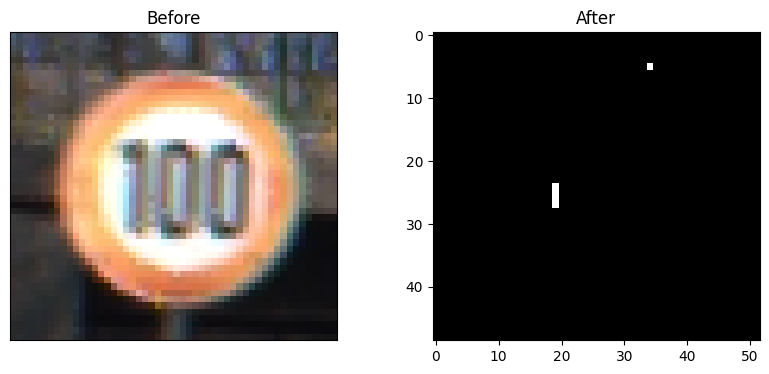

In [40]:
plt.figure(figsize=(10, 4))

im = train_images[2]
plt.subplot(1, 2, 1)
plt.imshow(im, cmap='gray')
plt.title("Before")
plt.xticks([]), plt.yticks([])



result = process_image(im, 'blue')

plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray')
plt.title("After")

plt.show()

(([], []), ([], []))

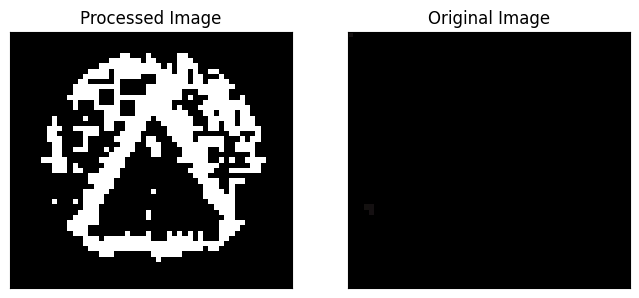

In [41]:
bright_imgs = [normalise_brightness(im, 100) for im in train_images]

plt.figure(figsize=(8, 6))

j=10
image = bright_imgs[j]
image = remove_border(image)

not_bright = train_images[j]
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

col = 'red'
new = color_segmentation(image, col)[1]
new_norm = color_segmentation(not_bright, col)[0]

plt.subplot(1, 2, 1)
plt.imshow(new, cmap='gray')
plt.title("Processed Image")
plt.xticks([]), plt.yticks([])


plt.subplot(1, 2, 2)
plt.imshow(new_norm, cmap = 'gray')
plt.title("Original Image")
plt.xticks([]), plt.yticks([])

The results here are pretty good. Let's try to find a way to classify which color the sign is.

In [42]:
def has_white_clump_near_center(img, radius=10, threshold=80):
    """
    Checks if there is a clump of white pixels near the center of a binary image.

    Parameters:
        img       : binary image (0 and 255 values)
        radius    : radius of the circular region to check (in pixels)
        threshold : minimum number of white pixels to consider it a 'clump'

    Returns:
        True if clump found, False otherwise
    """

    h, w = img.shape
    center = (w // 2, h // 2)

    # Create a circular mask
    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y - center[1])**2)
    mask = dist_from_center <= radius

    # Count white pixels within the circle
    clump_area = img[mask]
    white_count = np.sum(clump_area == 255)

    return white_count >= threshold

In [43]:
def compute_fill_ratio(image, contour): 
    ''' Computes the fill ratio of the shape bounded by the contour, assumes image is binary.
    '''
    mask = np.zeros_like(image)
    cv2.drawContours(mask, [contour], 0, 255, thickness=cv2.FILLED)
    total_pixels = np.sum(mask==255)
    white_pixels = np.sum((image == 255) & (mask == 255))

    return white_pixels / total_pixels if total_pixels != 0 else 0

('red', 48.91034482758621)


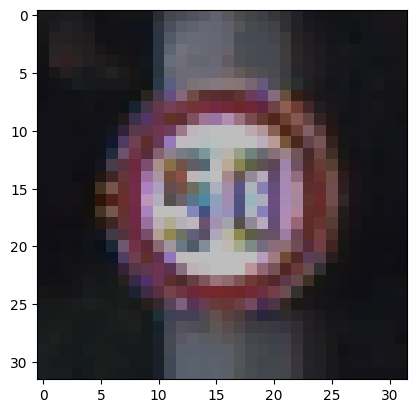

In [44]:
colors = ['red', 'blue', 'yellow']

def shape_color(img, cols = colors):
    ''' finds the dominant colour in a sign. Returns a 3-tuple with the best color, confidence level of the prediction
    and the fill_ratio of the resulting shape. 
    '''
    best_contours = []
    cnt_scores = []
    for col in cols:
        image = process_image(img, col, brightness = 80)
        contours,_ = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
        # Yellow is special: if yellow in a diamond near the center of the image, the image should basically always 
        # be classified as yellow, because there is only one yellow street sign and it takes that form 
        if col == 'yellow':
            if has_white_clump_near_center(image):
                return (col, 100)
            else: 
                continue

        if len(contours) > 1: 
            best_cnt = max(contours, key = cv2.contourArea)
            best_contours.append(best_cnt)
            ## Punish for the color having a high amount of contours (which is indicative of fragmented background color)
            cnt_scores.append(cv2.contourArea(best_cnt) / len(contours)) 
        else: 
            cnt_scores.append(0)

        
    best_score = max(cnt_scores)
    index = cnt_scores.index(best_score)
    best_color = colors[index]
    cnt_scores.pop(index)
    # We don't want to classify anything as yellow here. If it met the conditions for being a yellow traffic sign,
    # function would have returned already 

    if len(cols) == 1:
        confidence = INFTY
    else:  
        confidence = best_score / (max(cnt_scores) + 1)
    return (best_color, confidence)

j=100
new = train_images[j]
print(shape_color(new))
plt.imshow(normalise_brightness(new, 70))

Correct colour classification on 96 of the first 100 images. This is good enough - For those with low confidence, we can just use the same color as the mode color detected by other images of the same ID. 

In [45]:
df

,id,image_path,ClassId,edge_density,mean_b,mean_g,mean_r,image
0,7218,img_000001.jpg,32,0.050293,63.748291,62.107910,62.850830,"[[[81, 70, 71], [75, 66, 69], [65, 58, 59], [5..."
1,6333,img_000002.jpg,13,0.034424,48.680664,52.872314,61.539307,"[[[44, 34, 27], [46, 36, 29], [46, 36, 30], [4..."
2,6867,img_000003.jpg,7,0.126709,99.174561,110.774658,127.348389,"[[[72, 95, 114], [60, 73, 91], [77, 81, 101], ..."
3,7730,img_000004.jpg,4,0.026123,30.493896,26.616211,29.006592,"[[[24, 19, 20], [25, 24, 22], [16, 18, 18], [1..."
4,6338,img_000005.jpg,35,0.106934,116.836670,97.684814,79.495605,"[[[61, 75, 75], [54, 73, 72], [55, 79, 78], [6..."
...,...,...,...,...,...,...,...,...
5483,456,img_005484.jpg,17,0.100586,97.798096,107.457275,139.611816,"[[[56, 50, 49], [56, 49, 48], [58, 50, 49], [5..."
5484,4084,img_005485.jpg,4,0.034180,171.357422,156.866699,163.271484,"[[[150, 142, 156], [144, 136, 149], [142, 134,..."
5485,5117,img_005486.jpg,2,0.247559,144.043701,158.237793,180.798340,"[[[30, 31, 24], [40, 41, 29], [31, 32, 16], [8..."
5486,3334,img_005487.jpg,3,0.038818,89.712158,84.372314,83.712646,"[[[217, 220, 229], [213, 219, 226], [211, 221,..."


In [46]:
df['color'] = df['image'].apply(lambda x: shape_color(x)[0])
df['color_conf'] = df['image'].apply(lambda x: shape_color(x)[1])

In [47]:
red_counts = df[df['color'] == 'red'].groupby('ClassId')['color'].count().reindex(np.arange(num_id), fill_value=0)
blue_counts = df[df['color'] == 'blue'].groupby('ClassId')['color'].count().reindex(np.arange(num_id), fill_value=0)
yellow_counts = df[df['color'] == 'yellow'].groupby('ClassId')['color'].count().reindex(np.arange(num_id), fill_value=0)
gray_counts = df[df['color'] == 'yellow'].groupby('ClassId')['color'].count().reindex(np.arange(num_id), fill_value=0)

In [48]:
red_counts

ClassId
0      28
1     302
2     304
3     175
4     266
5     218
6      33
7     192
8     167
9     201
10    250
11    172
12     25
13    271
14    108
15     87
16     52
17    148
18    154
19     25
20     37
21     45
22     54
23     68
24     38
25    206
26     75
27     32
28     73
29     37
30     58
31     99
32     26
33      1
34      1
35     11
36      2
37      0
38     34
39      2
40      5
41     27
42     15
Name: color, dtype: int64

In [49]:
modes = df.groupby('ClassId')['color'].apply(lambda x: x.mode()[0])
modes
df['color'] = df['ClassId'].apply(lambda x: modes[x])

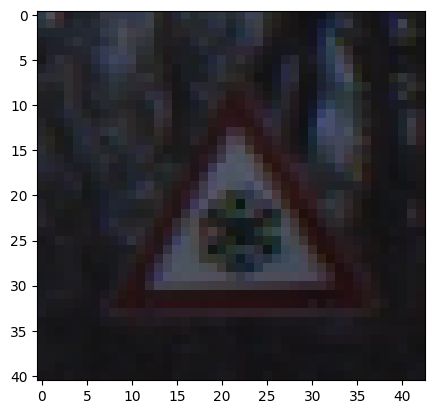

In [50]:
imgs = [(df[df['ClassId'] == i].sample(1))['image'].reset_index(drop = True)[0] for i in range(num_id)]
plt.imshow(imgs[30], cmap = 'gray')


In [51]:
df[df['ClassId'] == 20]['color_conf'].median()# Low

np.float64(18.689610389610387)

Very low confidence for some classes! This means the image is neither blue, red or yellow, which is the case for a few signs like the one above! One strategy could be to see if the median is very low (<2 as a guess from looking at distribution), we should classify the sign colour as 'na'. 

In [52]:
medians = df.groupby('ClassId')['color_conf'].apply(lambda x: x.median())

median_threshold = 2
df['medians'] = df['ClassId'].apply(lambda x: medians[x])
df.loc[df['medians'] < median_threshold, 'color'] = 'na'
df.groupby('ClassId')['color'].unique()

ClassId
0        [red]
1        [red]
2        [red]
3        [red]
4        [red]
5        [red]
6         [na]
7        [red]
8        [red]
9        [red]
10       [red]
11       [red]
12    [yellow]
13       [red]
14       [red]
15       [red]
16       [red]
17       [red]
18       [red]
19       [red]
20       [red]
21       [red]
22       [red]
23       [red]
24       [red]
25       [red]
26       [red]
27       [red]
28       [red]
29       [red]
30       [red]
31       [red]
32        [na]
33      [blue]
34      [blue]
35      [blue]
36      [blue]
37      [blue]
38      [blue]
39      [blue]
40      [blue]
41        [na]
42        [na]
Name: color, dtype: object

In [53]:
medians

ClassId
0      66.517483
1      68.025641
2      48.616071
3      25.562500
4      34.357143
5      39.106884
6       1.700000
7      33.273077
8      35.928571
9      74.150000
10     56.250000
11     30.567929
12    100.000000
13     36.645646
14     81.736842
15    102.092491
16     31.152062
17     39.243697
18     34.052632
19     35.250000
20     18.689610
21     27.285017
22     48.920455
23     28.128571
24     33.292827
25     39.545385
26     49.870000
27     49.352083
28     52.111538
29     35.904727
30     23.336863
31     43.374359
32      0.283385
33     77.796706
34     57.833333
35     68.056760
36     80.322917
37     48.500000
38     47.166053
39    125.757362
40     45.184564
41      0.792824
42      1.033365
Name: color_conf, dtype: float64

In [54]:
confidences = []
for i in range(num_id):
    conf = 0 
    main_col = modes[i]
    if main_col == 'red':
        conf = red_counts[i] / (red_counts[i] + blue_counts[i] + yellow_counts[i])
    elif main_col == 'blue':
        conf = blue_counts[i] / (red_counts[i] + blue_counts[i] + yellow_counts[i])
    else: 
        conf = yellow_counts[i] / (red_counts[i] + blue_counts[i] + yellow_counts[i])
    confidences.append(conf)
df['color_conf_counts'] = df['ClassId'].apply(lambda x: confidences[x])

This color labelling is 100% accurate on the training set, conditional on the assumption that each sign has it's own color, and the same sign can't change color. Which is reasonable, by domain knowledge: Signs are designed to be recognisable, constantly changing color is not something that would constitute good sign design.

### Detecting Fill

We make a simple extension from the work done in classifying color; just check if its filled. This can be done by computing the fill ratio of the contours computed from the earlier shapes. Up until a threshold.

In [55]:
def determineFill(image, color):
    im = image.copy()
    im = process_image(image, color)
    contours,_ = cv2.findContours(im, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) <= 1: 
        return 0
    
    best_cnt = max(contours, key = cv2.contourArea)
    
    return compute_fill_ratio(im, best_cnt)

In [56]:
def determineFill2(image, color):
    im = image.copy()
    im = process_image(image, color)
    contours,_ = cv2.findContours(im, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) <= 1: 
        return 0
    
    best_cnt = max(contours, key = cv2.contourArea)
    
    return best_cnt

Comptue fill ratio using median within each class. 

0.9929577464788732


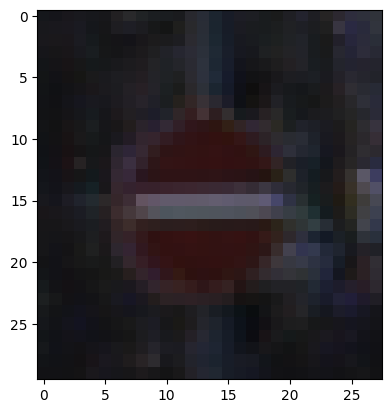

In [57]:
j = 12
image = train_images[j]
fill_ratio = determineFill(image, 'red')
print(fill_ratio)
plt.imshow(image)

In [58]:
df['fill_ratio'] = df.apply(lambda row: determineFill(row['image'], row['color']) if row['color'] != 'na' else 1, axis=1)
aggregate_fill_ratios = df.groupby('ClassId').apply(
    lambda x: np.median(x['fill_ratio'])).reset_index(drop = True)
df['aggregate_fill_ratios'] = df['ClassId'].apply(lambda x: aggregate_fill_ratios[x]);
aggregate_fill_ratios

C:\Users\YKip1\AppData\Local\Temp\ipykernel_20376\2706012841.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aggregate_fill_ratios = df.groupby('ClassId').apply(


0     0.572452
1     0.526455
2     0.563200
3     0.541451
4     0.556233
5     0.575379
6     1.000000
7     0.501847
8     0.561856
9     0.561689
10    0.654378
11    0.675147
12    1.000000
13    0.622342
14    0.854284
15    0.507902
16    0.491266
17    0.994398
18    0.659030
19    0.664384
20    0.798678
21    0.732646
22    0.639175
23    0.646972
24    0.605031
25    0.642952
26    0.672291
27    0.578473
28    0.634729
29    0.649411
30    0.553659
31    0.644689
32    1.000000
33    0.845811
34    0.861035
35    0.829704
36    0.835900
37    0.933222
38    0.939111
39    0.906885
40    0.875704
41    1.000000
42    1.000000
dtype: float64

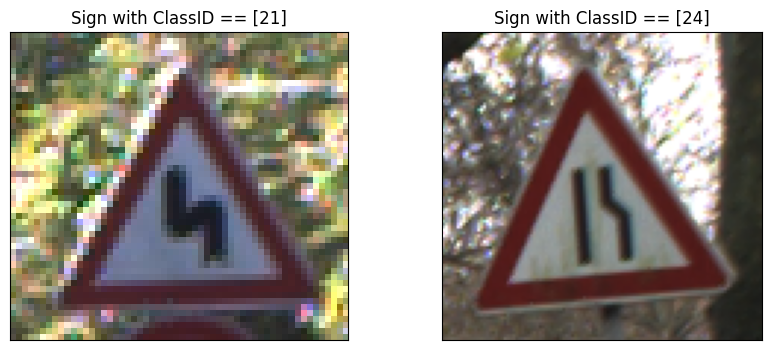

In [80]:
j = 21
k= 24
imgs = [(df[df['ClassId'] == i].sample(1))['image'].reset_index(drop = True)[0] for i in range(num_id)]

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(imgs[j])
plt.xticks([]),plt.yticks([])
plt.title(f'Sign with ClassID == [{j}]');

plt.subplot(1, 2, 2)
plt.imshow(imgs[k])
plt.xticks([]),plt.yticks([])
plt.title(f'Sign with ClassID == [{k}]');


0.5918674698795181


Text(0.5, 1.0, 'Color segmented image with Contour')

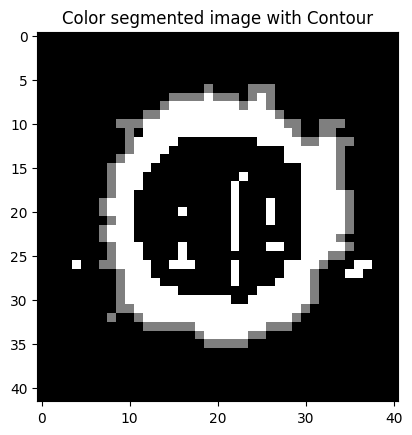

In [60]:
[]
img = process_image(train_images[2209], 'red')
cnt = find_best_contour(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(compute_fill_ratio(img, cnt))
cv2.drawContours(img, [cnt], 0, 127, 1)
plt.imshow(img, cmap = 'gray')
plt.title("Color segmented image with Contour")

In [61]:
df.groupby('ClassId')['fill_ratio'].apply(lambda x: np.median(x)) # Doing a weighted average sucks bc filled in objects also have large contour areas 

ClassId
0     0.572452
1     0.526455
2     0.563200
3     0.541451
4     0.556233
5     0.575379
6     1.000000
7     0.501847
8     0.561856
9     0.561689
10    0.654378
11    0.675147
12    1.000000
13    0.622342
14    0.854284
15    0.507902
16    0.491266
17    0.994398
18    0.659030
19    0.664384
20    0.798678
21    0.732646
22    0.639175
23    0.646972
24    0.605031
25    0.642952
26    0.672291
27    0.578473
28    0.634729
29    0.649411
30    0.553659
31    0.644689
32    1.000000
33    0.845811
34    0.861035
35    0.829704
36    0.835900
37    0.933222
38    0.939111
39    0.906885
40    0.875704
41    1.000000
42    1.000000
Name: fill_ratio, dtype: float64

In [62]:
filled_thresh = 0.8
df['filled'] = df['aggregate_fill_ratios'].apply(lambda x: x >= filled_thresh)
df['filled_conf'] = df['aggregate_fill_ratios'].apply(lambda x: x / ((1+filled_thresh) / 2) if x < ((1+filled_thresh) / 2) else 1)
df

,id,image_path,ClassId,edge_density,mean_b,mean_g,mean_r,image,color,color_conf,medians,color_conf_counts,fill_ratio,aggregate_fill_ratios,filled,filled_conf
0,7218,img_000001.jpg,32,0.050293,63.748291,62.107910,62.850830,"[[[81, 70, 71], [75, 66, 69], [65, 58, 59], [5...",na,1.312500,0.283385,0.764706,1.000000,1.000000,True,1.000000
1,6333,img_000002.jpg,13,0.034424,48.680664,52.872314,61.539307,"[[[44, 34, 27], [46, 36, 29], [46, 36, 30], [4...",red,233.666667,36.645646,0.897351,0.541333,0.622342,False,0.691491
2,6867,img_000003.jpg,7,0.126709,99.174561,110.774658,127.348389,"[[[72, 95, 114], [60, 73, 91], [77, 81, 101], ...",red,4.300000,33.273077,0.950495,0.990909,0.501847,False,0.557608
3,7730,img_000004.jpg,4,0.026123,30.493896,26.616211,29.006592,"[[[24, 19, 20], [25, 24, 22], [16, 18, 18], [1...",red,70.936813,34.357143,0.960289,0.478969,0.556233,False,0.618037
4,6338,img_000005.jpg,35,0.106934,116.836670,97.684814,79.495605,"[[[61, 75, 75], [54, 73, 72], [55, 79, 78], [6...",blue,112.500000,68.056760,0.934524,0.829333,0.829704,True,0.921893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5483,456,img_005484.jpg,17,0.100586,97.798096,107.457275,139.611816,"[[[56, 50, 49], [56, 49, 48], [58, 50, 49], [5...",red,15.750000,39.243697,0.954839,1.000000,0.994398,True,1.000000
5484,4084,img_005485.jpg,4,0.034180,171.357422,156.866699,163.271484,"[[[150, 142, 156], [144, 136, 149], [142, 134,...",red,0.000000,34.357143,0.960289,0.000000,0.556233,False,0.618037
5485,5117,img_005486.jpg,2,0.247559,144.043701,158.237793,180.798340,"[[[30, 31, 24], [40, 41, 29], [31, 32, 16], [8...",red,42.433333,48.616071,0.965079,0.387550,0.563200,False,0.625778
5486,3334,img_005487.jpg,3,0.038818,89.712158,84.372314,83.712646,"[[[217, 220, 229], [213, 219, 226], [211, 221,...",red,0.920455,25.562500,0.888325,0.977848,0.541451,False,0.601612


In [63]:
df.groupby('ClassId')['filled'].unique()

ClassId
0     [False]
1     [False]
2     [False]
3     [False]
4     [False]
5     [False]
6      [True]
7     [False]
8     [False]
9     [False]
10    [False]
11    [False]
12     [True]
13    [False]
14     [True]
15    [False]
16    [False]
17     [True]
18    [False]
19    [False]
20    [False]
21    [False]
22    [False]
23    [False]
24    [False]
25    [False]
26    [False]
27    [False]
28    [False]
29    [False]
30    [False]
31    [False]
32     [True]
33     [True]
34     [True]
35     [True]
36     [True]
37     [True]
38     [True]
39     [True]
40     [True]
41     [True]
42     [True]
Name: filled, dtype: object

All our labels are correct, but we can't be sure on the performance of individual fill detection on individual images. That's why we include the confidence parameter. 

### Finding words

Now we try to detect the text on the images. 

In [64]:
from PIL import Image, ImageEnhance
from paddleocr import PaddleOCR

c:\Users\YKip1\OneDrive\uni\y3_sem1\Machine_learning\.venv\Lib\site-packages\paddle\utils\cpp_extension\extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)


[2025/05/22 13:42:26] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\YKip1/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\YKip1/.paddleocr/whl\\rec\\en\\en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320',

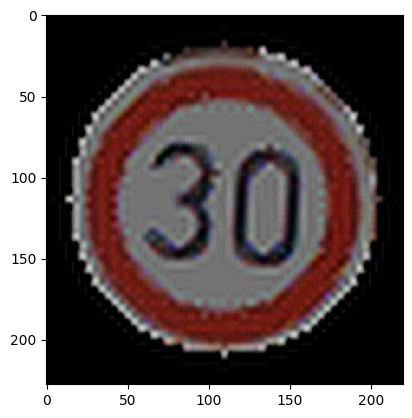

In [65]:
imgs = [(df[df['ClassId'] == i].sample(1))['image'].reset_index(drop = True)[0] for i in range(num_id)]
im = imgs[1]

im = normalise_brightness(im, 100)


im = remove_border(im)
im = Image.fromarray(im)
enhancer = ImageEnhance.Contrast(im)
im_contrast = enhancer.enhance(2.0)
def upscale(im, factor=8):
    return im.resize((im.width * factor, im.height * factor), Image.LANCZOS)
im = upscale(im, 4)
im = np.array(im)
sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
im = cv2.filter2D(im, -1, sharpen_kernel)

ocr = PaddleOCR(use_angle_cls=True, lang='en')
result = ocr.ocr(im)

# Filter results to keep only digits
digit_results = []
for line in result:
    # Make sure line is a list with at least 2 items and second item is not None
    if isinstance(line, list) and len(line) > 1 and line[1] is not None:
        text = line[1][0]
        digits_only = ''.join(filter(str.isdigit, text))
        if digits_only:
            digit_results.append(digits_only)
print(digit_results)
plt.imshow(im);

[2025-05-22 13:42:28,555] [ WARNING] easyocr.py:71 - Using CPU. Note: This module is much faster with a GPU.


[([[np.int32(63), np.int32(81)], [np.int32(257), np.int32(81)], [np.int32(257), np.int32(239)], [np.int32(63), np.int32(239)]], '80', np.float64(0.7807937315561444))]


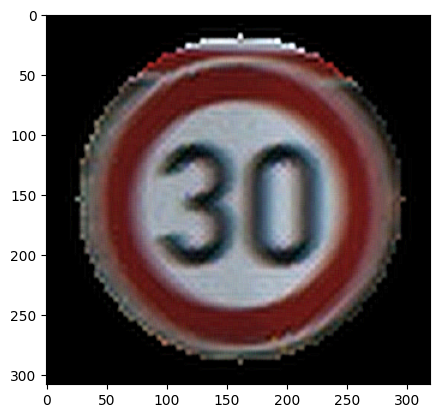

In [66]:
imgs = [(df[df['ClassId'] == i].sample(1))['image'].reset_index(drop = True)[0] for i in range(num_id)]
im = imgs[1]
im = normalise_brightness(im, 100)


im = remove_border(im)
im = Image.fromarray(im)
enhancer = ImageEnhance.Contrast(im)
im_contrast = enhancer.enhance(2.0)
def upscale(im, factor=4):
    return im.resize((im.width * factor, im.height * factor), Image.LANCZOS)
im = upscale(im, 4)
im = np.array(im)
sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
im = cv2.filter2D(im, -1, sharpen_kernel)
#im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
#  SHARPENING: 
# sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
# im = cv2.filter2D(im, -1, sharpen_kernel)
# plt.imshow(sharpen)



reader = easyocr.Reader(['en'], gpu = False)
text = results = reader.readtext(
    np.array(im),
    contrast_ths=0.05,
    text_threshold=0.3,
    low_text=0.2,
    allowlist = '0123456789'
)
print(text)
plt.imshow(im, cmap = 'gray');


easyOCR just doesn't work. It is better to just hand-label the data (pretty easy, only 42 classes) then train a CNN to do the text recognition. 

Text(0.5, 1.0, '23th class id')

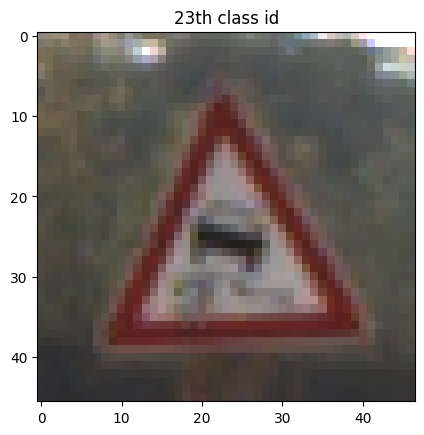

In [67]:
i = 23
imgs = [(df[df['ClassId'] == i].sample(1))['image'].reset_index(drop = True)[0] for i in range(num_id)]

plt.imshow(imgs[i])
plt.title(f'{i}th class id')

In [ ]:
class_id_to_text = {
    0: '20',
    1: '30',
    2: '50',
    3: '60',
    4: '70',
    5: '80', 
    6: '80', 
    7: '100',
    8: '120', 
    14: 'STOP'
}
df['text_label'] = df['ClassId'].map(lambda x: class_id_to_text.get(x, 'na'))

In [69]:
df.shape

(5488, 17)

We now train a CNN on the whole training set. 

In [ ]:
from torch.utils.data import DataLoader, random_split
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
import torch.nn.functional as F

class OCRNet(nn.Module):
    def __init__(self, num_classes):
        super(OCRNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1) 
        self.pool = nn.MaxPool2d(2, 2)              
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 12 * 12, 128)     
        self.fc2 = nn.Linear(128, num_classes)      

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) 
        x = self.pool(F.relu(self.conv2(x))) 
        x = x.view(-1, 64 * 12 * 12)         
        x = F.relu(self.fc1(x))              
        x = self.fc2(x)                      
        return x

# Need to format the relevant data for PyTorch to work 
class TrafficSignTextDataset(Dataset):
    def __init__(self, df, transform=None):
        self.images = df['image'].values
        self.labels = df['label_idx'].values
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label


def train_ocr_model(df, num_epochs = 10, batch_size = 32, learning_rate = 1e-3):
    ''' Trains the OCR model on a dataframe containing a 'text label' column , returns 
    the model and various other parameters. 
    '''

    # Get unique labels
    text_labels = df['text_label'].unique()

    # Create mappings
    label2idx = {label: idx for idx, label in enumerate(sorted(text_labels))}
    idx2label = {idx: label for label, idx in label2idx.items()}

    # Assign integer labels (ignore 'na' rows for training)
    df_copy = df.copy()
    df_copy['label_idx'] = df_copy['text_label'].map(label2idx)

    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((50, 50)),
        transforms.ToTensor(),
    ])

    # Dataset and dataloaders
    dataset = TrafficSignTextDataset(df_copy, transform=transform)
    train_len = int(0.8 * len(dataset))
    val_len = len(dataset) - train_len
    train_set, val_set = random_split(dataset, [train_len, val_len])
    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_set, batch_size=batch_size)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = OCRNet(num_classes=len(label2idx)).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model 
    for epoch in range(num_epochs):
        model.train()
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    # Now we evaluate it 
    model.eval()
    correct = total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    print(f"Validation Accuracy: {correct / total:.2%}")

    return model, transform, device, label2idx, idx2label

full_ocr_model, full_transform, full_device, label2idx, idx2label = train_ocr_model(df)

Validation Accuracy: 97.45%


In [74]:
def predict_text_batch(images, model, transform, device):
    ''' Predicts the text in the image based on our CNN model. 
    '''
    model.eval()
    preds = []
    with torch.no_grad():
        for img in images:
            img_tensor = transform(img).unsqueeze(0).to(device)  # add batch dimension
            output = model(img_tensor)
            pred_idx = output.argmax(dim=1).item()
            pred_text = idx2label.get(pred_idx, 'na')
            preds.append(pred_text)
    return preds

### Non-specific 

Color histograms seems to help the SVM model a lot, so lets try to get HSV channel histogram as well. 

In [75]:
def extract_HSV_histogram(img, h_bins, s_bins, v_bins):
    ''' Finds the HSV histogram of an image. 
    '''
    img = remove_border(img)
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    hist_h = cv2.calcHist([hsv], [0], None, [h_bins], [0, 180])
    hist_s = cv2.calcHist([hsv], [1], None, [s_bins], [0, 256])
    hist_v = cv2.calcHist([hsv], [2], None, [v_bins], [0, 256])

    hist_h = cv2.normalize(hist_h, hist_h).flatten()
    hist_s = cv2.normalize(hist_s, hist_s).flatten()
    hist_v = cv2.normalize(hist_v, hist_v).flatten()

    return np.concatenate([hist_h, hist_s, hist_v])

h_bins = 60
s_bins = 60
v_bins = 60

# Add into our dataframe
hsv_colnames = [f'h_{i}' for i in range(h_bins)] + [f's_{i}' for i in range(s_bins)] + [f'v_{i}' for i in range(v_bins)]
hist_df1 = pd.DataFrame(df['image'].apply(lambda x: extract_HSV_histogram(x, h_bins, s_bins, v_bins)).to_list(), columns = hsv_colnames)
df1 = pd.concat([df, hist_df1], axis = 1)
hist_df1

,h_0,h_1,h_2,h_3,h_4,h_5,h_6,h_7,h_8,h_9,...,v_50,v_51,v_52,v_53,v_54,v_55,v_56,v_57,v_58,v_59
0,0.971898,0.035532,0.037622,0.054343,0.041802,0.037622,0.027171,0.010451,0.006270,0.002090,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.975456,0.037424,0.014644,0.028475,0.039051,0.062644,0.074847,0.080542,0.041491,0.012203,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.956559,0.024488,0.086473,0.170650,0.155345,0.114787,0.061985,0.034436,0.022192,0.013009,...,0.022469,0.021667,0.018457,0.023271,0.023271,0.019259,0.037716,0.036913,0.053765,0.307344
3,0.970639,0.030448,0.017531,0.012917,0.008304,0.003691,0.001845,0.004613,0.002768,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.880170,0.000000,0.000000,0.000000,0.000000,0.000000,0.001969,0.001969,0.001969,0.001969,...,0.008422,0.006317,0.008422,0.012633,0.016844,0.012633,0.014739,0.012633,0.018950,0.008422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5483,0.974480,0.097541,0.186721,0.056667,0.029727,0.012076,0.010219,0.008361,0.008361,0.002787,...,0.013011,0.010008,0.017014,0.013011,0.007006,0.009008,0.012010,0.007006,0.024020,0.376314
5484,0.949238,0.002976,0.005951,0.000000,0.004463,0.001488,0.002976,0.000000,0.000000,0.000000,...,0.012078,0.006039,0.004529,0.003020,0.001510,0.003020,0.000000,0.001510,0.001510,0.030196
5485,0.980146,0.069163,0.148497,0.063060,0.034242,0.021359,0.017969,0.012883,0.006442,0.003729,...,0.008005,0.007242,0.016391,0.020584,0.019821,0.025920,0.034306,0.029351,0.042692,0.721952
5486,0.956637,0.011409,0.008776,0.016675,0.013165,0.013165,0.009654,0.007021,0.004388,0.000878,...,0.025398,0.021895,0.017516,0.000876,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Perhaps we can extract things relating to texture?

In [76]:
def extract_lbp(image, radius = 1, resize_shape = (64, 64)):
    img = cv2.resize(image, resize_shape) # Necessary for lbp 
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    n_points = 8 * radius
    return local_binary_pattern(img, n_points, radius, method = 'uniform').flatten()

lbp_features = np.stack(df['image'].apply(extract_lbp).values)
lbp_df = pd.DataFrame(lbp_features, columns = [f'lbp_{i}' for i in range(lbp_features.shape[1])])

In [77]:
df1.shape

(5488, 197)

In [78]:
df2 = pd.concat([df1, lbp_df], axis = 1)

4096 elements per image would multiply the dimensionality of our data by more than 10. This should be reduced with PCA. 

# Model Fitting And Evaluations

In [135]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, KBinsDiscretizer, PowerTransformer
from sklearn import tree, svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import seaborn as sns

## Final preprocessings

In [80]:
df3 = df2.copy()
y = df3['ClassId']
df3 = df3.drop(columns = ['ClassId', 'image_path'], axis = 1);

First things first, let's formally test the accuracy of our color and filled classifier. 

In [81]:
test = df[['image', 'color', 'filled']] 
test['color_guess'] = test['image'].apply(lambda x: shape_color(x, colors)[0] if shape_color(x, colors)[1] > 2 else 'NONE')
og_len = len(test)
test = test[test['color_guess'] != 'NONE']
new_len = len(test)
print(og_len, new_len)

len(test.loc[test['color_guess'] == test['color']])/len(test)


5488 4939


0.9459404737801175

In [82]:
fill_thresh = 0.75
test['filled_guess'] = test.apply(lambda x: determineFill(x['image'], x['color_guess']) >= fill_thresh if x['color_guess'] != 'NONE' else 1, axis = 1)
len(test.loc[test['filled'] == test['filled_guess']]) / len(test)

0.798947155294594

Standardise our other features.

In [83]:
hog_pca_scaled = StandardScaler().fit_transform(hog_pca.drop(columns = 'image_path', axis = 1))
color_histogram_scaled = StandardScaler().fit_transform(color_histogram.drop(columns = 'image_path', axis = 1))

hpca_cols = hog_pca.drop(columns = 'image_path', axis = 1).columns
color_histogram_cols = color_histogram.drop(columns = 'image_path', axis = 1).columns

hog_pca_df = pd.DataFrame(hog_pca_scaled, columns = hpca_cols)
color_histogram_scaled_df = pd.DataFrame(color_histogram_scaled, columns = color_histogram_cols)

In [84]:
def encode_col(df, colname, encoder = None):
    ''' Returns df containing the one-hot-encoding of colname in df, and returns the encoder.
    '''
    if encoder == None:
        encoderr = OneHotEncoder()
        encoded = encoderr.fit_transform(df[[colname]])
    else: 
        encoderr = encoder
        encoded = encoderr.transform(df[[colname]])
    encoded_cols = encoderr.get_feature_names_out([colname])
    encoded_df = pd.DataFrame(encoded.toarray(), columns=encoded_cols, index = df.index)
    return (encoded_df, encoderr)

def discretise_col(df, colname, n_bins = 10):
    ''' Returns df containing the one-hot encoding discretisation using k-means
    '''
    discretiser = KBinsDiscretizer(n_bins=n_bins, encode='onehot', strategy='kmeans')
    discretised = discretiser.fit_transform(df[[colname]])
    discretised_cols = discretiser.get_feature_names_out([colname])
    discretised_df = pd.DataFrame(discretised.toarray(), columns=discretised_cols, index = df.index)
    return (discretised_df, discretiser)

def scale_col(df, columns, scaler = None):
    ''' Scales columns and returns the corresponding dataframe
    '''
    if scaler == None:
        scalerr = StandardScaler()
        scaled = scalerr.fit_transform(df[columns])
    else: 
        scalerr = scaler
        scaled = scalerr.transform(df[columns])
    return pd.DataFrame(scaled, columns = columns, index = df.index), scalerr

def transform_col(df, columns, transformer = None):
    ''' Applies transformations first and then scales. Works better on skewed distributions than scale_col. 
    '''
    if transformer == None: 
        pt = PowerTransformer(method='yeo-johnson')
        transformed = pt.fit_transform(df[columns])
    else: 
        pt = transformer
        transformed = pt.transform(df[columns])
    return pd.DataFrame(transformed, columns = columns, index = df.index), pt

In [88]:
na_thresh = 1.5 # confidence level we need before we classify a color as red, blue or yellow

# X = pd.concat([df3, hog_pca, color_histogram], axis = 1)
# 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
#
# ## We need to extract the features for 'color' and 'filled' without looking at the test data.  
# X_test = X_test.drop(columns = ['color', 'filled', 'color_conf'], axis = 1)
# 
# X_test['color'] = X_test['image'].apply(lambda x: shape_color(x, colors)[0] if shape_color(x, colors)[1] > na_thresh else 'na')
# X_test['color_conf'] = X_test['image'].apply(lambda x: shape_color(x, colors)[1])
# X_test['filled'] = X_test[['image', 'color']].apply(lambda x: determineFill(x['image'], x['color']) >= fill_thresh if x['color'] != 'na' else 1, axis = 1)
# 
# # Encode colors for X_train, use the encoder to encode colors for X_test
# col_disc, encoder = encode_col(X_train, 'color')
# X_train = pd.concat([X_train.drop(columns = 'color', axis = 1), col_disc], axis = 1)
# X_test = pd.concat([X_test.drop(columns = 'color', axis = 1), encode_col(X_test, 'color', encoder)[0]], axis = 1)
# 
# # Standardise hog_pca and color_histogram first on X_train then X_test 
# hog_pca_scaled, scaler = scale_col(X_train, list(hpca_cols))
# X_train = pd.concat([X_train.drop(columns = list(hpca_cols), axis = 1), hog_pca_scaled], axis = 1)
# X_test = pd.concat([X_test.drop(columns = list(hpca_cols), axis = 1), scale_col(X_test, list(hpca_cols), scaler)[0]], axis = 1)
# 
# # Standardise color histogram in the same way 
# col_hist_scaled, scaler = scale_col(X_train, list(color_histogram_cols))
# X_train = pd.concat([X_train.drop(columns = list(color_histogram_cols), axis = 1), col_hist_scaled], axis = 1)
# X_test = pd.concat([X_test.drop(columns = list(color_histogram_cols), axis = 1), scale_col(X_test, list(color_histogram_cols), scaler)[0]], axis = 1)
# 
# # Standardise color confidence 
# col_conf_scaled, scaler = scale_col(X_train, ['color_conf'])
# X_train = pd.concat([X_train.drop(columns = 'color_conf', axis = 1), col_conf_scaled], axis = 1)
# X_test = pd.concat([X_test.drop(columns = 'color_conf', axis = 1), scale_col(X_test, ['color_conf'], scaler)[0]], axis = 1)
 
X = pd.concat([df3, hog_pca.drop('image_path', axis = 1), color_histogram.drop('image_path', axis = 1)], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# We calculate the hsv histogram for the train and test set
hsv_colnames = [f'h_{i}' for i in range(h_bins)] + [f's_{i}' for i in range(s_bins)] + [f'v_{i}' for i in range(v_bins)]
train_hist = pd.DataFrame(X_train['image'].apply(lambda x: extract_HSV_histogram(x, h_bins, s_bins, v_bins)).to_list(), columns = hsv_colnames)
test_hist = pd.DataFrame(X_test['image'].apply(lambda x: extract_HSV_histogram(x, h_bins, s_bins, v_bins)).to_list(), columns = hsv_colnames)

cont_cols = ['edge_density', 'mean_b', 'mean_g', 'mean_r', 'color_conf'] + list(hpca_cols) \
    + list(color_histogram_cols) + list(hsv_colnames) # The continous columns we hope to scale

X_train1 = X_train[cont_cols]
X_test1 = X_test[cont_cols]

train_scaled, transformer = scale_col(X_train1, cont_cols)
test_scaled = scale_col(X_test1, cont_cols, transformer)[0]

# Encode colors
train_color, encoder = encode_col(X_train, 'color')
test_color = encode_col(X_test, 'color', encoder)[0]

training_model, training_transform, training_device = train_ocr_model(X_train)[:3] 

# Finally, label test set with 'text_label' using OCR model, then encode it 
X_test['text_label'] = predict_text_batch(X_test['image'], training_model, training_transform, training_device)
text_encoded, text_encoder = encode_col(X_train, 'text_label')
test_text_encoded = encode_col(X_test, 'text_label', text_encoder)[0]
X_train1 = pd.concat([
    train_scaled, 
    train_color, 
    text_encoded], axis = 1)
X_test1 = pd.concat([
    test_scaled,
    test_color, 
    test_text_encoded], axis = 1)

Validation Accuracy: 92.98%


Now we perform the text classification

Time to perform PCA on lbp. 

In [ ]:
####       
####
####     n_comps = 1500
####     
####     pca = PCA(n_components=n_comps, random_state=1461296)
####     
####     # Scale first then fit PCA on the train set 
####     lbp_scaled, scaler = scale_col(X_train, list(lbp_df.columns))
####     lbp_test_scaled = scale_col(X_test, list(lbp_df.columns), scaler)[0]
####     
####     # Fit PCA
####     lbp_pca = pca.fit_transform(lbp_scaled)
####     lbp_pca_test = pca.transform(lbp_test_scaled)
####     
####     # Standardise PCA 
####     colnames = [f'lbp_pca_{i}' for i in range(n_comps)]
####     lbp_pca_df = pd.DataFrame(lbp_pca, index = X_train.index, columns = colnames)
####     lbp_pca_test_df = pd.DataFrame(lbp_pca_test, index = X_test.index, columns = colnames)
####     
####     lbp_pca_scaled, pca_scaler = scale_col(lbp_pca_df, lbp_pca_df.columns)
####     lbp_pca_scaled_test = scale_col(lbp_pca_test_df, lbp_pca_test_df.columns, pca_scaler)[0]
####     
####     # Now merge back into our data
####     X_train = pd.concat([X_train.drop(columns = lbp_df.columns, axis = 1), lbp_pca_scaled], axis = 1)
####     X_test = pd.concat([X_test.drop(columns = lbp_df.columns, axis = 1), lbp_pca_scaled_test], axis = 1) 
####     
####     X_train.shape, X_test.shape

Doesn't really work. Lowers SVM accuracy significantly, increases computational time to the point where its no longer practical: too many features required to be kept. 

In [ ]:
### explained_var = pca.explained_variance_ratio_
### 
### cumulative_var = np.cumsum(explained_var)

In [ ]:
###  plt.plot(range(1, len(cumulative_var) + 1), cumulative_var, marker = 'o')
###  plt.xlabel("Number of components")
###  plt.ylabel("Cumulative Explained Variance")
###  plt.title("Cumulative Explained Variance Vs. Number of Components")
###  plt.grid(True)

In [89]:
# There is no 'interesting' class or rare event, so PMI not as helpful for feature selection as the more general MI. 
mi_scores = mutual_info_classif(X_train1, y_train, discrete_features = 'auto', random_state=1461296)
mi_series = pd.Series(mi_scores, index = X_train1.columns).sort_values(ascending = False)

In [90]:
X_test1.shape, X_train1.shape

((1647, 315), (3841, 315))

In [91]:
list(mi_series.index)

['hog_pca_0',
 'hog_pca_3',
 'text_label_na',
 'hog_pca_1',
 'color_red',
 'hog_pca_2',
 'color_blue',
 'hog_pca_5',
 'hog_pca_12',
 'hog_pca_4',
 'hog_pca_8',
 'h_37',
 'color_conf',
 'h_0',
 'h_58',
 'hog_pca_7',
 'h_59',
 'h_36',
 'mean_r',
 'h_1',
 'text_label_50',
 'text_label_80',
 'text_label_30',
 'h_57',
 'mean_b',
 'hog_pca_9',
 'mean_g',
 'hog_pca_18',
 'hog_pca_11',
 'h_56',
 'text_label_70',
 'hog_pca_10',
 'edge_density',
 's_45',
 'h_38',
 'color_yellow',
 'h_54',
 'h_3',
 'h_55',
 'h_39',
 'text_label_60',
 'h_4',
 'h_2',
 'h_5',
 'h_35',
 'h_6',
 's_40',
 's_12',
 's_41',
 'hog_pca_6',
 's_43',
 'v_6',
 'h_7',
 'h_53',
 'text_label_120',
 's_42',
 's_39',
 'text_label_100',
 's_1',
 's_44',
 'v_5',
 's_46',
 'ch_63',
 's_4',
 'v_7',
 'v_10',
 'ch_84',
 'ch_2',
 'v_4',
 'ch_31',
 'v_59',
 's_13',
 'ch_86',
 'ch_85',
 's_2',
 'h_52',
 'ch_26',
 'ch_79',
 'ch_29',
 'v_8',
 'ch_12',
 'ch_95',
 's_7',
 'v_9',
 'ch_48',
 'hog_pca_17',
 's_3',
 'color_na',
 'ch_44',
 's_15',


In [ ]:
#features = ['edge_density', 'mean_b', 'mean_g', 'mean_r', 'color_conf'] \
#    + list(color_histogram_cols) + list(hsv_colnames) + list(text_encoded.columns) + list(hpca_cols)
#
#X_train1 = X_train1[features]
#X_test1 = X_test1[features]
#X_train1.shape, X_test1.shape

((3841, 311), (1647, 311))

## Decision tree

In [136]:
pipe = Pipeline([
    ('feature_selection', SelectKBest(score_func = mutual_info_classif)),
    ('clf', tree.DecisionTreeClassifier(random_state=1461296))
])

param_grid = {
    'feature_selection__k': range(25, 150, 25),
    'clf__splitter': ['best', 'random'],
    'clf__max_depth': [20, 25, 30]
}

grid_dt = GridSearchCV(pipe, param_grid, cv=5, scoring = 'accuracy', n_jobs=-1)

grid_dt.fit(X_train1, y_train)

y_pred_dt = grid_dt.predict(X_test1)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification report:\n", classification_report(y_test, y_pred_dt))

Accuracy: 0.718882817243473
Confusion matrix:
 [[ 1  8  0 ...  0  0  0]
 [ 0 75  2 ...  0  0  0]
 [ 0  4 83 ...  0  0  0]
 ...
 [ 0  0  0 ...  8  0  0]
 [ 0  0  0 ...  0  6  1]
 [ 0  0  0 ...  0  0 11]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.09      0.17        11
           1       0.83      0.85      0.84        88
           2       0.93      0.86      0.90        96
           3       0.94      0.60      0.73        57
           4       0.90      0.92      0.91        77
           5       0.66      0.78      0.71        67
           6       0.93      1.00      0.97        14
           7       0.88      0.75      0.81        69
           8       0.70      0.90      0.79        52
           9       0.61      0.56      0.58        61
          10       0.61      0.73      0.67        86
          11       0.43      0.47      0.45        51
          12       1.00      1.00      1.00        82
          13    

In [137]:
train_accuracy = grid_dt.score(X_train1, y_train)
print(f"Training accuracy: {train_accuracy:.4f}")

Training accuracy: 0.9927


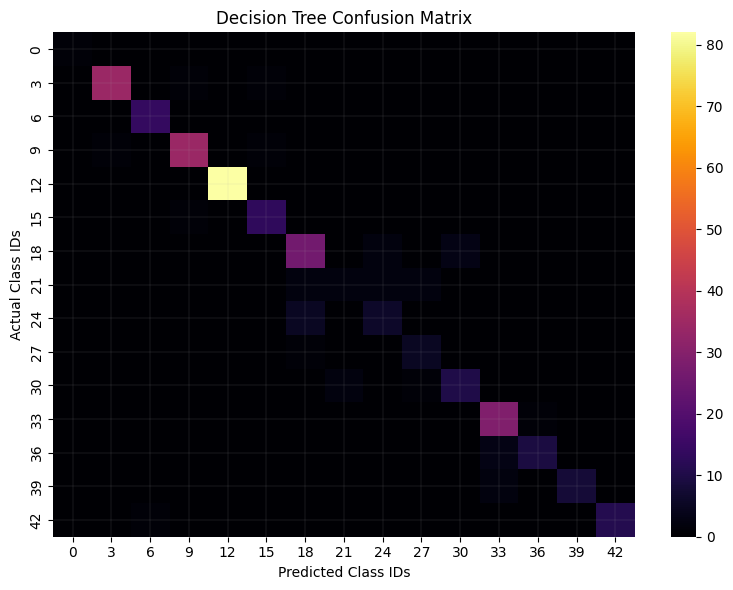

In [139]:
labels = [3*i for i in range(num_id // 3 + 1)]
cm_svm = confusion_matrix(y_test, y_pred_dt, labels=labels)
plt.figure(figsize = (8, 6))
sns.heatmap(cm_svm, fmt='d', cmap='inferno', xticklabels = labels,
            yticklabels=labels)
plt.xlabel('Predicted Class IDs')
plt.ylabel('Actual Class IDs')
plt.title('Decision Tree Confusion Matrix')
plt.grid(True, linewidth = 0.1)
plt.tight_layout()
plt.show()

In [138]:
grid_dt.best_params_

{'clf__max_depth': 25, 'clf__splitter': 'best', 'feature_selection__k': 75}

In [141]:
tree_ = grid_dt.best_estimator_.named_steps['clf']
tree_importances = tree_.feature_importances_

tree_feature_importance_df = pd.DataFrame({
    'feature': X_train1[mi_series[:75].index].columns,
    'importance': tree_importances
}).sort_values(by='importance', ascending=False)

tree_feature_importance_df.head(5)

,feature,importance
6,color_blue,0.070502
69,ch_59,0.059421
70,ch_26,0.058249
66,ch_63,0.056322
72,s_15,0.052948


## SVM

In [95]:
# Feature selection not very helpful for svm, manual tweakings revealed the same thing. 
pipe = Pipeline([
    ('clf', svm.SVC())
])

param_grid = {
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__kernel': ['linear', 'rbf']
}

grid_svm = GridSearchCV(pipe, param_grid, cv=5, scoring = 'accuracy', n_jobs=-1)
grid_svm.fit(X_train1, y_train)
# model.fit(X_train, y_train)
y_pred_svm = grid_svm.predict(X_test1)

print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification report:\n", classification_report(y_test, y_pred_svm))

train_accuracy = grid_svm.score(X_train1, y_train)
print(f"Training accuracy: {train_accuracy:.4f}")

Accuracy: 0.8463873709775349
Confusion matrix:
 [[ 4  6  0 ...  0  0  0]
 [ 1 81  2 ...  0  0  0]
 [ 0  5 82 ...  0  0  0]
 ...
 [ 0  0  1 ... 10  0  0]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  2 11]]
Classification report:
               precision    recall  f1-score   support

           0       0.80      0.36      0.50        11
           1       0.83      0.92      0.87        88
           2       0.89      0.85      0.87        96
           3       0.92      0.63      0.75        57
           4       0.92      0.92      0.92        77
           5       0.70      0.82      0.75        67
           6       1.00      1.00      1.00        14
           7       0.93      0.77      0.84        69
           8       0.69      0.92      0.79        52
           9       0.79      0.89      0.84        61
          10       0.81      0.92      0.86        86
          11       0.57      0.82      0.67        51
          12       1.00      0.99      0.99        82
          13   

In [96]:
grid_svm.best_score_

np.float64(0.8729549333550064)

In [97]:
grid_svm.best_params_

{'clf__C': 1, 'clf__kernel': 'linear'}

In [98]:
y_test

1468     7
33      26
8       24
4550    21
889     13
        ..
789     13
1626    33
3437    38
1776    13
2077    14
Name: ClassId, Length: 1647, dtype: int64

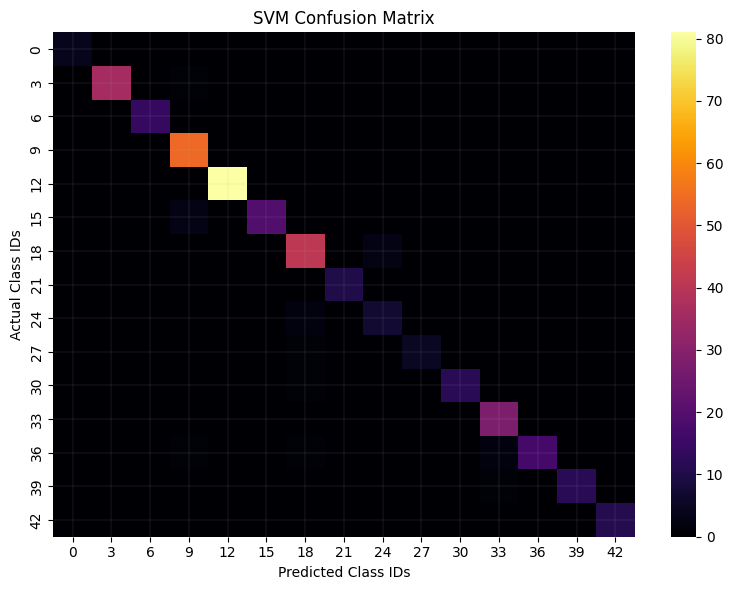

In [99]:
labels = [3*i for i in range(num_id // 3 + 1)]
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=labels)
plt.figure(figsize = (8, 6))
sns.heatmap(cm_svm, fmt='d', cmap='inferno', xticklabels = labels,
            yticklabels=labels)
plt.xlabel('Predicted Class IDs')
plt.ylabel('Actual Class IDs')
plt.title('SVM Confusion Matrix')
plt.grid(True, linewidth = 0.1)
plt.tight_layout()
plt.show()

## Random Forest

From previous tests, it was noticed that the columns 'filled' and 'color' negatively impact the performance of the random forest model. Gridsearch doesn't pick up on this by use of mutual info classification, because it doesn't test for interactions between columns (would result in very long run times). We remove it manually. 

In [100]:
rf_features =  ['edge_density', 'mean_b', 'mean_g', 'mean_r', 'color_conf'] + \
    list(hpca_cols) + list(color_histogram_cols) + list(hsv_colnames) + list(text_encoded.columns) # All the features we are considering in rf model

pipe = Pipeline([
    ('feature_selection', SelectKBest(score_func = mutual_info_classif)),
    ('clf', RandomForestClassifier(random_state=1461296))
])

param_grid = {
    'feature_selection__k': range(150, 300, 25),
    'clf__n_estimators': [200],
    'clf__criterion': ['gini']
}

grid_rf = GridSearchCV(pipe, param_grid, cv=5, scoring = 'accuracy', n_jobs=-1)
grid_rf.fit(X_train1, y_train)

y_pred_rf = grid_rf.predict(X_test1)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.8221007893139041
Confusion matrix:
 [[ 1  8  0 ...  0  0  0]
 [ 0 75  2 ...  0  0  0]
 [ 0  4 83 ...  0  0  0]
 ...
 [ 0  0  0 ... 10  0  0]
 [ 0  0  0 ...  0  6  1]
 [ 0  0  0 ...  0  2 10]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.09      0.17        11
           1       0.83      0.85      0.84        88
           2       0.93      0.86      0.90        96
           3       0.94      0.60      0.73        57
           4       0.90      0.92      0.91        77
           5       0.67      0.78      0.72        67
           6       0.93      1.00      0.97        14
           7       0.88      0.75      0.81        69
           8       0.70      0.90      0.79        52
           9       0.73      0.79      0.76        61
          10       0.68      0.92      0.78        86
          11       0.57      0.78      0.66        51
          12       1.00      1.00      1.00        82
          13   

In [144]:
train_accuracy = grid_rf.score(X_train1, y_train)
print(f"Training accuracy: {train_accuracy:.4f}")

Training accuracy: 1.0000


In [101]:
grid_rf.best_params_

{'clf__criterion': 'gini',
 'clf__n_estimators': 200,
 'feature_selection__k': 150}

In [102]:
grid_rf.best_score_

np.float64(0.8833665203727785)

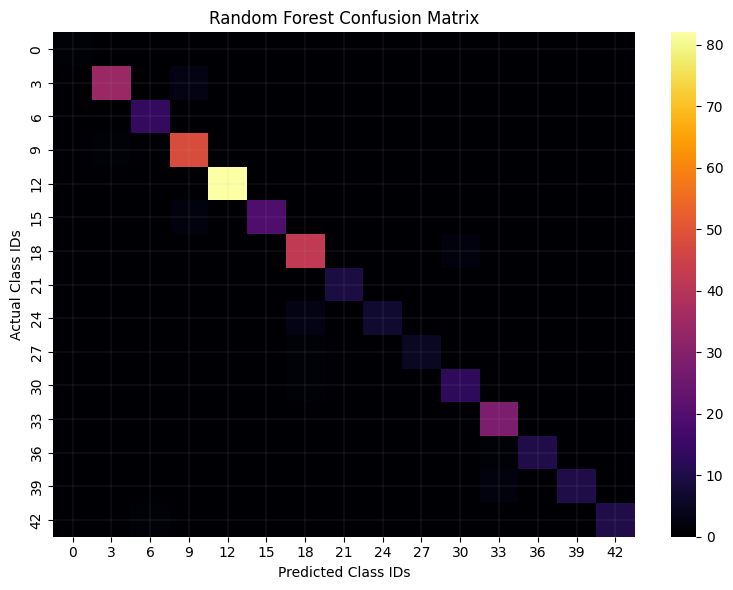

In [103]:
labels = [3*i for i in range(num_id // 3 + 1)]
cm_svm = confusion_matrix(y_test, y_pred_rf, labels=labels)
plt.figure(figsize = (8, 6))
sns.heatmap(cm_svm, fmt='d', cmap='inferno', xticklabels = labels,
            yticklabels=labels)
plt.xlabel('Predicted Class IDs')
plt.ylabel('Actual Class IDs')
plt.title('Random Forest Confusion Matrix')
plt.grid(True, linewidth = 0.1)
plt.tight_layout()
plt.show()

In [143]:
rf_tree_ = grid_rf.best_estimator_.named_steps['clf']
tree_importances = rf_tree_.feature_importances_

tree_feature_importance_df = pd.DataFrame({
    'feature': X_train1[mi_series[:150].index].columns,
    'importance': tree_importances
}).sort_values(by='importance', ascending=False)

tree_feature_importance_df.head(5)

,feature,importance
6,color_blue,0.035715
144,v_40,0.035645
8,hog_pca_4,0.034428
145,ch_67,0.034031
147,ch_83,0.030983


# Model Usage on Given Test Data

In [104]:
test = pd.read_csv("2025_A2/test/test_metadata.csv")
test_add_features = pd.read_csv("2025_A2/test/features/additional_features.csv")
test_color_histogram = pd.read_csv("2025_A2/test/features/color_histogram.csv")
test_hog_pca = pd.read_csv("2025_A2/test/features/hog_pca.csv")

test = test.merge(test_add_features, on = 'image_path')#.merge(color_histogram_test, on = 'image_path').merge(hog_pca_test, on = 'image_path')

In [ ]:
min_vals = test_color_histogram.drop(columns = 'image_path').min()
max_vals = test_color_histogram.drop(columns = 'image_path').max()

# Combine into a single DataFrame for display
min_max_df = pd.DataFrame({'min': min_vals, 'max': max_vals})
min_max_df_sorted = min_max_df.sort_values(by='max', ascending=False)
min_max_df_sorted


,min,max
ch_33,0.0,0.998665
ch_95,0.0,0.997379
ch_65,0.0,0.996900
ch_63,0.0,0.996419
ch_31,0.0,0.995790
...,...,...
ch_94,0.0,0.590287
ch_55,0.0,0.558434
ch_86,0.0,0.557565
ch_56,0.0,0.554657


In [105]:
test['image'] = test['image_path'].apply(lambda x: cv2.cvtColor(cv2.imread(test_path + '/' + x), cv2.COLOR_BGR2RGB))
test['color'] = test['image'].apply(lambda x: shape_color(x, colors)[0] if shape_color(x, colors)[1] > na_thresh else 'na')
test['color_conf'] = test['image'].apply(lambda x: shape_color(x, colors)[1])

In [106]:
train = df

In [ ]:
##  Standardising and encoding the columns which need to be processed, first on the training set
# train_hog_pca_scaled, hog_pca_scaler = scale_col(train_hog_pca, train_hog_pca.columns)
# train_color, encoder = encode_col(train, 'color')
# train_cols_scaled, cols_scaler = scale_col(train, ['color_conf', 'mean_b', 'mean_g', 'mean_r', 'edge_density'])
# train1 = train.drop(['color_conf', 'mean_b', 'mean_g', 'mean_r', 'edge_density'], axis = 1)

## Performing the standardisation/scaling on test set, using same scalers/encoders on the test set. 
#test_hog_pca_scaled = scale_col(test_hog_pca1, test_hog_pca1.columns, hog_pca_scaler)[0]
#test_color = encode_col(test, 'color', encoder)[0]
#test_cols_scaled = scale_col(test, ['color_conf', 'mean_b', 'mean_g', 'mean_r', 'edge_density'], cols_scaler)[0]
#test1 = test.drop(['color_conf', 'mean_b', 'mean_g', 'mean_r', 'edge_density'], axis = 1)

# Now we can merge back
# train1 = pd.concat([train1, train_cols_scaled, train_hog_pca_scaled, train_color_histogram, train_color, train_hist], axis = 1)
# test1 = pd.concat([test1, test_cols_scaled, test_hog_pca_scaled, test_color_histogram, test_color, test_hist], axis = 1)

In [107]:
train_hog_pca = hog_pca.drop('image_path', axis = 1)
train_color_histogram = color_histogram.drop('image_path', axis = 1)
test_hog_pca1 = test_hog_pca.drop(columns = 'image_path', axis = 1)
test_color_histogram1 = test_color_histogram.drop(columns = 'image_path', axis = 1)

# We calculate the hsv histogram for the train and test set
hsv_colnames = [f'h_{i}' for i in range(h_bins)] + [f's_{i}' for i in range(s_bins)] + [f'v_{i}' for i in range(v_bins)]
train_hist = pd.DataFrame(train['image'].apply(lambda x: extract_HSV_histogram(x, h_bins, s_bins, v_bins)).to_list(), columns = hsv_colnames)
test_hist = pd.DataFrame(test['image'].apply(lambda x: extract_HSV_histogram(x, h_bins, s_bins, v_bins)).to_list(), columns = hsv_colnames)

cont_cols = ['edge_density', 'mean_b', 'mean_g', 'mean_r', 'color_conf'] + list(hpca_cols) \
    + list(train_color_histogram.columns) +  list(hsv_colnames) # The continous columns we hope to scale

train1 = pd.concat([train, train_hog_pca, train_color_histogram, train_hist], axis = 1)
test1 = pd.concat([test, test_hog_pca1, test_color_histogram1, test_hist], axis = 1)

train1 = train1[cont_cols]
test1 = test1[cont_cols]

train_scaled, transformer = transform_col(train1, cont_cols)
test_scaled = transform_col(test1, cont_cols, transformer)[0]

# Encode colors
train_color, encoder = encode_col(train, 'color')
test_color = encode_col(test, 'color', encoder)[0]

# Finally, label test set with 'text_label' using OCR model, then encode it 
test['text_label'] = predict_text_batch(test['image'], full_ocr_model, full_transform, full_device)
text_encoded, text_encoder = encode_col(train, 'text_label')
test_text_encoded = encode_col(test, 'text_label', text_encoder)[0]
X = pd.concat([train_scaled, train_color, text_encoded], axis = 1)
X_test = pd.concat([test_scaled, test_color, test_text_encoded], axis = 1)

In [108]:
y = train['ClassId']

In [109]:
X_test = X_test[X.columns]

Now we train our models on the full dataset.

In [121]:
mi_scores = mutual_info_classif(X, y, discrete_features = 'auto', random_state=1461296)
mi_series = pd.Series(mi_scores, index = X.columns).sort_values(ascending = False)

hog_pca_0        0.875873
hog_pca_3        0.782880
text_label_na    0.637501
hog_pca_1        0.548430
color_red        0.537674
                   ...   
ch_18            0.123052
ch_76            0.122170
ch_80            0.122070
ch_57            0.122033
ch_19            0.121410
Length: 124, dtype: float64

In [123]:
mi_series[:125].index

Index(['hog_pca_0', 'hog_pca_3', 'text_label_na', 'hog_pca_1', 'color_red',
       'hog_pca_2', 'color_blue', 'hog_pca_5', 'hog_pca_4', 'hog_pca_8',
       ...
       'ch_15', 'v_58', 'v_44', 'ch_74', 'ch_18', 'ch_76', 'ch_80', 'ch_57',
       'ch_19', 'v_48'],
      dtype='object', length=125)

Decision Tree

In [111]:
pipe = Pipeline([
    ('feature_selection', SelectKBest(score_func = mutual_info_classif)),
    ('clf', tree.DecisionTreeClassifier(random_state=1461296))
])

param_grid = {
    'feature_selection__k': range(25, 150, 25),
    'clf__splitter': ['best', 'random'],
    'clf__max_depth': [20, 25, 30]
}

grid_dt = GridSearchCV(pipe, param_grid, cv=5, scoring = 'accuracy', n_jobs=-1)
grid_dt.fit(X, y)
y_pred = grid_dt.predict(X_test)

test['ClassId'] = y_pred

In [112]:
grid_dt.best_params_, grid_dt.best_score_

({'clf__max_depth': 30, 'clf__splitter': 'best', 'feature_selection__k': 125},
 np.float64(0.7840761274746659))

In [113]:
test[['id', 'ClassId']].to_csv('dt_results.csv', index = False , header = True)

In [126]:
tree = grid_dt.best_estimator_.named_steps['clf']
importances = tree.feature_importances_

feature_importance_df = pd.DataFrame({
    'feature': X[mi_series[:125].index].columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

feature_importance_df.head(5)

,feature,importance
6,color_blue,0.062556
120,ch_76,0.058268
8,hog_pca_4,0.058098
119,ch_18,0.057408
116,v_58,0.054299


SVM

In [115]:
# Values of C and the kernel type were obtained from the validation set. 

pipe = Pipeline([
    ('clf', svm.SVC())
])

param_grid = {
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__kernel': ['linear', 'rbf']
}

grid_svm = GridSearchCV(pipe, param_grid, cv=5, scoring = 'accuracy', n_jobs=-1)
grid_svm.fit(X, y)
# model.fit(X_train, y_train)
y_pred = grid_svm.predict(X_test)
test['ClassId'] = y_pred

In [116]:
grid_svm.best_score_

np.float64(0.9169090066799169)

In [117]:
grid_svm.best_params_

{'clf__C': 10, 'clf__kernel': 'rbf'}

In [118]:
test[['id', 'ClassId']].to_csv('svm_results.csv', index = False , header = True)

Now for the Random Forest model.

In [119]:
#rf_features = features = ['edge_density', 'mean_b', 'mean_g', 'mean_r',  'color_conf'] + \
#    list(hpca_cols) + list(color_histogram_cols) + list(hsv_colnames) \
#    + list(text_encoded.columns) # All the features we are considering 
#X = X[rf_features]
#X_test = X_test[rf_features]

rf = RandomForestClassifier(200)
rf = rf.fit(X, y)
y_pred_rf = rf.predict(X_test)
test['ClassId'] = y_pred_rf

In [120]:
test[['id', 'ClassId']].to_csv('random_forest_results.csv', index = False , header = True)